In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import LabelEncoder

Context and Content
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

This dataset designed to understand the factors that lead a person to leave current job for HR researches too. By model(s) that uses the current credentials,demographics,experience data you will predict the probability of a candidate to look for a new job or will work for the company, as well as interpreting affected factors on employee decision.

The whole data divided to train and test . Target isn't included in test but the test target values data file is in hands for related tasks. A sample submission correspond to enrollee_id of test set provided too with columns : enrollee _id , target

Note:

The dataset is imbalanced.
Most features are categorical (Nominal, Ordinal, Binary), some with high cardinality.
Missing imputation can be a part of your pipeline as well.
Features

enrollee_id              : Unique ID for candidate

city                     : City code

city_ development _index : Developement index of the city (scaled)

gender                   : Gender of candidate

relevent_experience      : Relevant experience of candidate

enrolled_university      : Type of University course enrolled if any

education_level          : Education level of candidate

major_discipline         :Education major discipline of candidate

experience               : Candidate total experience in years

company_size             : No of employees in current employer's company

company_type             : Type of current employer

lastnewjob               : Difference in years between previous job and current job

training_hours           : training hours completed

target                   : 0 – Not looking for job change, 1 – Looking for a job change

Inspiration
Predict the probability of a candidate will work for the company
Interpret model(s) such a way that illustrate which features affect candidate decision

In [2]:
df_test = pd.read_csv('aug_test.csv')
df_train = pd.read_csv('aug_train.csv')

In [3]:
dst1 = df_train

In [4]:
dst1

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [5]:
dst1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
dst1.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
dst1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [8]:
dst1.describe

<bound method NDFrame.describe of        enrollee_id      city  city_development_index gender  \
0             8949  city_103                   0.920   Male   
1            29725   city_40                   0.776   Male   
2            11561   city_21                   0.624    NaN   
3            33241  city_115                   0.789    NaN   
4              666  city_162                   0.767   Male   
...            ...       ...                     ...    ...   
19153         7386  city_173                   0.878   Male   
19154        31398  city_103                   0.920   Male   
19155        24576  city_103                   0.920   Male   
19156         5756   city_65                   0.802   Male   
19157        23834   city_67                   0.855    NaN   

           relevent_experience enrolled_university education_level  \
0      Has relevent experience       no_enrollment        Graduate   
1       No relevent experience       no_enrollment        Graduate   

In [9]:
missing = dst1.isnull().sum().sort_values(ascending=False).reset_index()
missing.columns = ['features','missing_num']
missing['percentage'] = missing['missing_num']/dst1.shape[0]
missing

,features,missing_num,percentage
0,company_type,6140,0.320493
1,company_size,5938,0.309949
2,gender,4508,0.235306
3,major_discipline,2813,0.146832
4,education_level,460,0.024011
5,last_new_job,423,0.022080
6,enrolled_university,386,0.020148
7,experience,65,0.003393
8,target,0,0.000000
9,training_hours,0,0.000000


In [10]:
dst1['relevent_experience'].value_counts()

Has relevent experience    13792
No relevent experience      5366
Name: relevent_experience, dtype: int64

In [11]:
dst1['education_level'].value_counts()

Graduate          11598
Masters            4361
High School        2017
Phd                 414
Primary School      308
Name: education_level, dtype: int64

In [12]:
dst1['major_discipline'].value_counts()

STEM               14492
Humanities           669
Other                381
Business Degree      327
Arts                 253
No Major             223
Name: major_discipline, dtype: int64

In [13]:
dst1['company_size'].value_counts()

50-99        3083
100-500      2571
10000+       2019
10/49        1471
1000-4999    1328
<10          1308
500-999       877
5000-9999     563
Name: company_size, dtype: int64

# EDA 

### - Gender

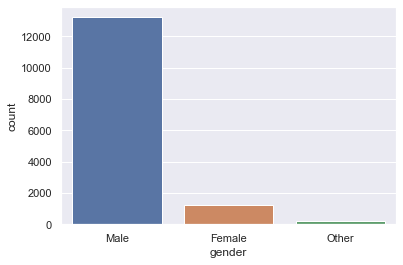

In [14]:
sns.set_theme(style="darkgrid")
sns.countplot(x="gender", data=dst1)

Text(0.5, 1.0, 'Gender precentage looking for new job')

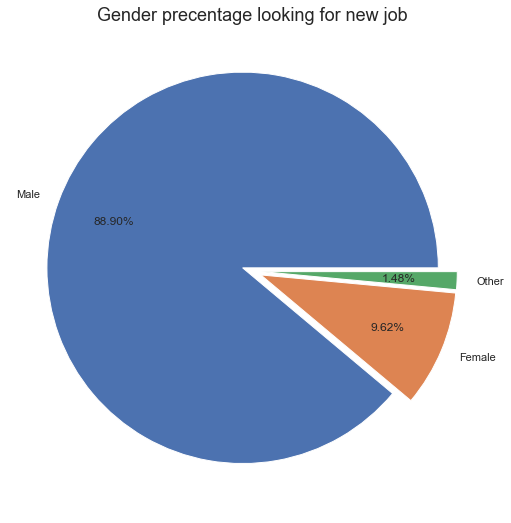

In [15]:
gender = dst1[dst1['target'] == 1]['gender']
temp = gender.value_counts()
labels = temp.keys()
bar,ax = plt.subplots(figsize=(12,9))
plt.pie(x = temp, labels = labels, autopct="%.2f%%", explode=[0.05]*3, pctdistance=0.7)
plt.title('Gender precentage looking for new job', fontsize=18)

In [16]:
male_job = dst1[(dst1['gender']=='Male') & dst1['target']==1]
female_job = dst1[(dst1['gender']=='Female') & dst1['target']==1]
other_job = dst1[(dst1['gender']=='Other') & dst1['target']==1]

In [17]:
print('{} Precentage of male who are looking for a new job'.format(len(male_job)/len(dst1['gender']=='Male')*100))
print('{} Precentage of female who are looking for a new job'.format(len(female_job)/len(dst1['gender']=='Female')*100))
print('{} Precentage of other who are looking for a new job'.format(len(other_job)/len(dst1['gender']=='Other')*100))

15.721891637958032 Precentage of male who are looking for a new job
1.7016390019835057 Precentage of female who are looking for a new job
0.2609875769913352 Precentage of other who are looking for a new job


Based on prcentage above, Male are the most gender whos looking for a job change

## - Relevant Experience

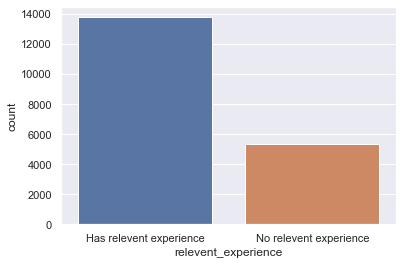

In [18]:
exp = dst1[dst1['target'] == 1]['relevent_experience']
sns.set_theme(style="darkgrid")
sns.countplot(x="relevent_experience", data=dst1)

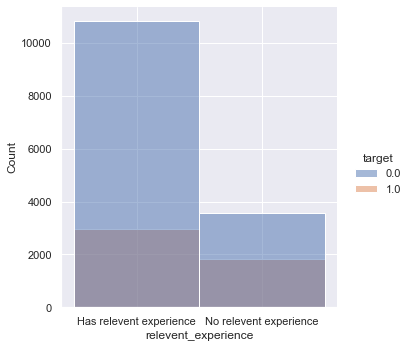

In [19]:
sns.displot(dst1, x="relevent_experience", hue="target", stat="count")

In [20]:
yes_newjob = dst1[(dst1['relevent_experience']=='Has relevent experience') & dst1['target']==1]
no_newjob = dst1[(dst1['relevent_experience']=='No relevent experience') & dst1['target']==1]

In [21]:
print('{} % of having relevant experience who are looking for a new job'.format(len(yes_newjob)/len(dst1['relevent_experience']=='Has relevent experience')*100))
print('{} % of not havinf relevant experience who are looking for a new job'.format(len(no_newjob)/len(dst1['relevent_experience']=='No relevent experience')*100))

15.45568430942687 % of having relevant experience who are looking for a new job
9.479068796325295 % of not havinf relevant experience who are looking for a new job


we can see that most people whos looking for a new job is already have experience in data sicentist

## - Major Discipline

In [53]:
sns.scatterplot(data=dst1, x="education_level", y="relevent_experience")

ValueError: Could not interpret value `education_level` for parameter `x`

## - Enrolled University

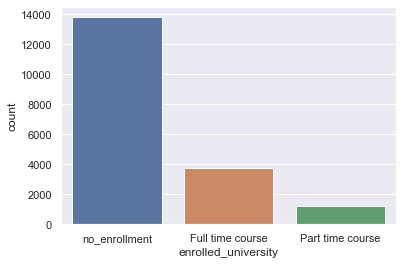

In [22]:
sns.set_theme(style="darkgrid")
sns.countplot(x="enrolled_university", data=dst1)

we can see that most off our data is have no experience in data sceintist enrollment

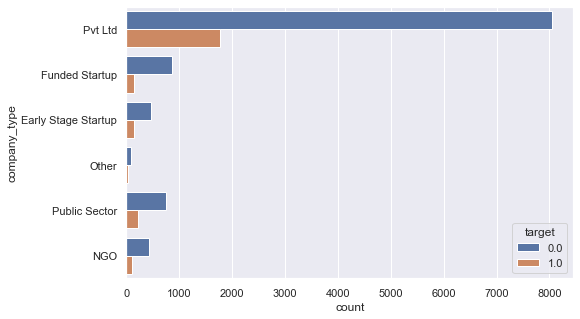

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(y="company_type", hue="target", data=dst1)
plt.show()

From above we can see that most people work in private companies have the most who want to change job

Text(0.5, 1.0, 'People who leaving company')

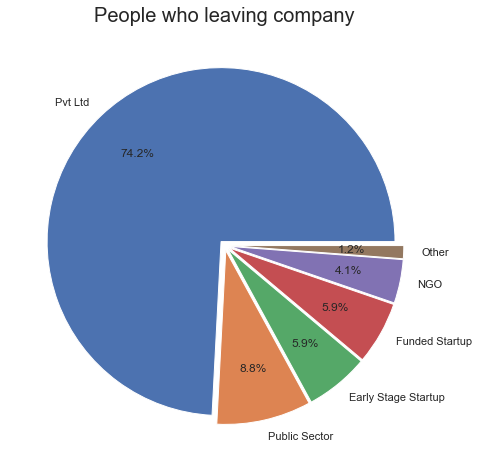

In [24]:
company_type = dst1[dst1['target'] == 1]['company_type']
cmp = company_type.value_counts()
labels = cmp.keys()
bar,ax = plt.subplots(figsize=(8,8))
plt.pie(x = cmp, labels = labels, autopct="%.1f%%", explode=[0.03]*6, pctdistance=0.7)
plt.title('People who leaving company', fontsize=20)

we can see that the most people who are looking for new job are from private companies

## - Last Job

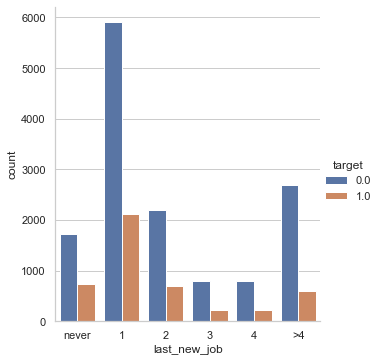

In [25]:
sns.set_theme(style="whitegrid")
sns.catplot(x="last_new_job", hue="target", order=['never','1','2','3','4','>4'], data=dst1, kind="count", height=5, aspect=.9)

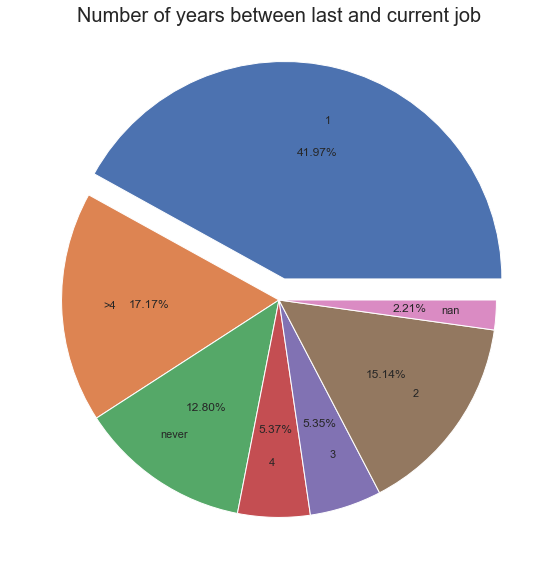

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
count = Counter(dst1['last_new_job'])
plt.pie(count.values(), labels=count.keys(), labeldistance=0.75, autopct=lambda p:f'{p:.2f}%',
       explode=[0.1]+[0]*6, shadow=False)
plt.title('Number of years between last and current job', fontsize=20)
plt.show()

# ------------------------------------------------------------------------------------

# Handling Missing Value

In [27]:
dst1.head(3)

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0


In [28]:
dst1.drop(['enrollee_id','city'],axis=1,inplace=True)

In [29]:
list(dst1.columns)

['city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

Replacing some Value in row so i can make it more easy to read for myself

In [30]:
dst1.replace(to_replace = 'Has relevent experience',value = 'Yes',inplace = True)
dst1.replace(to_replace = 'No relevent experience',value='No',inplace = True )

dst1.replace(to_replace = '<1',value = '0',inplace = True)
dst1.replace(to_replace = '>20',value = '21',inplace=True)
dst1.replace(to_replace = 'never',value = '0',inplace=True)
dst1.replace(to_replace = '>4',value = '5',inplace=True)

dst1.replace(to_replace = '<10',value = 'around_10',inplace=True)
dst1.replace(to_replace = '10/49',value = 'around_50',inplace=True)
dst1.replace(to_replace = '50-99',value = 'around_100',inplace=True)
dst1.replace(to_replace = '100-500',value = 'around_500',inplace=True)
dst1.replace(to_replace = '500-999',value = 'around_1000',inplace=True)
dst1.replace(to_replace = '1000-4999',value = 'around_5000',inplace=True)
dst1.replace(to_replace = '5000-9999',value = 'around_10000',inplace=True)
dst1.replace(to_replace = '10000+',value = 'more_than_10000',inplace=True)

dst1.replace(to_replace = 'Full time course',value = 'Full_time_course',inplace=True)
dst1.replace(to_replace = 'Part time course',value = 'Part_time_course',inplace=True)

dst1.replace(to_replace = 'Primary School',value = 'Primary_School',inplace=True)
dst1.replace(to_replace = 'High School',value = 'High_School',inplace=True)

dst1.replace(to_replace = 'Business Degree',value = 'Business_Degree',inplace=True)
dst1.replace(to_replace = 'No Major',value = 'No_Major',inplace=True)

dst1.replace(to_replace = 'Pvt Ltd',value = 'Pvt_Ltd',inplace=True)
dst1.replace(to_replace = 'Funded Startup',value = 'Funded_Startup',inplace=True)
dst1.replace(to_replace = 'Public Sector',value = 'Public_Sector',inplace=True)
dst1.replace(to_replace = 'Early Stage Startup',value = 'Early_Stage_Startup',inplace=True)

dst1['major_discipline'].replace('Other','Other_major',inplace=True)
dst1['company_type'].replace('Other','Other_type',inplace=True)

In [31]:
missing = dst1.isnull().sum().sort_values(ascending=False).reset_index()
missing.columns = ['features','missing_num']
missing['percentage'] = missing['missing_num']/dst1.shape[0]*100
missing

,features,missing_num,percentage
0,company_type,6140,32.049274
1,company_size,5938,30.994885
2,gender,4508,23.530640
3,major_discipline,2813,14.683161
4,education_level,460,2.401086
5,last_new_job,423,2.207955
6,enrolled_university,386,2.014824
7,experience,65,0.339284
8,target,0,0.000000
9,training_hours,0,0.000000


In [32]:
dst1.dropna(subset=['enrolled_university','education_level','experience','last_new_job'], axis=0, inplace=True)

im dropping those coloumn because their missing value is less then or equal 2%

Now i am gonna fill missing values with their mode as all the columns left have dtype as 'object'

In [33]:
col_mode = ['company_type','company_size','gender','major_discipline','relevent_experience']
for col in col_mode:
    dst1[col].fillna(dst1[col].mode()[0],inplace=True)

In [34]:
missing = dst1.isnull().sum().sort_values(ascending=False).reset_index()
missing.columns = ['features','missing_num']
missing['percentage'] = missing['missing_num']/dst1.shape[0]*100
missing

,features,missing_num,percentage
0,target,0,0.0
1,training_hours,0,0.0
2,last_new_job,0,0.0
3,company_type,0,0.0
4,company_size,0,0.0
5,experience,0,0.0
6,major_discipline,0,0.0
7,education_level,0,0.0
8,enrolled_university,0,0.0
9,relevent_experience,0,0.0


In [35]:
dst1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18014 non-null  float64
 1   gender                  18014 non-null  object 
 2   relevent_experience     18014 non-null  object 
 3   enrolled_university     18014 non-null  object 
 4   education_level         18014 non-null  object 
 5   major_discipline        18014 non-null  object 
 6   experience              18014 non-null  object 
 7   company_size            18014 non-null  object 
 8   company_type            18014 non-null  object 
 9   last_new_job            18014 non-null  object 
 10  training_hours          18014 non-null  int64  
 11  target                  18014 non-null  float64
dtypes: float64(2), int64(1), object(9)
memory usage: 1.8+ MB


In [36]:
dst1 = dst1.astype({'experience':int,'last_new_job':int})

In [37]:
dst1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18014 entries, 0 to 19157
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18014 non-null  float64
 1   gender                  18014 non-null  object 
 2   relevent_experience     18014 non-null  object 
 3   enrolled_university     18014 non-null  object 
 4   education_level         18014 non-null  object 
 5   major_discipline        18014 non-null  object 
 6   experience              18014 non-null  int32  
 7   company_size            18014 non-null  object 
 8   company_type            18014 non-null  object 
 9   last_new_job            18014 non-null  int32  
 10  training_hours          18014 non-null  int64  
 11  target                  18014 non-null  float64
dtypes: float64(2), int32(2), int64(1), object(7)
memory usage: 1.6+ MB


In [38]:
education_dst1 = pd.get_dummies(dst1[['education_level']],drop_first=True,prefix=[None])
company_size_dst1 = pd.get_dummies(dst1[['company_size']],drop_first=True,prefix=[None])
company_type_dst1 = pd.get_dummies(dst1[['company_type']],drop_first=True,prefix=[None])
major_dst1 = pd.get_dummies(dst1[['major_discipline']],drop_first=True,prefix=[None])
university_dst1 = pd.get_dummies(dst1[['enrolled_university']],drop_first=True,prefix=[None])
experience_dst1 = pd.get_dummies(dst1[['relevent_experience']],drop_first=True,prefix=[None])
gender_dst1 = pd.get_dummies(dst1[['gender']],drop_first=True,prefix=[None])

dropping original coloumns

In [39]:
dst1.drop(['education_level','company_size','company_type','major_discipline','enrolled_university','relevent_experience','gender'],axis=1,inplace=True)

In [40]:
dst1_final = pd.concat([dst1,education_dst1,company_size_dst1,company_type_dst1,major_dst1,university_dst1,experience_dst1,gender_dst1],axis=1) 

In [41]:
dst1_final.head()

,city_development_index,experience,last_new_job,training_hours,target,High_School,Masters,Phd,Primary_School,around_100,...,Business_Degree,Humanities,No_Major,Other_major,STEM,Part_time_course,no_enrollment,Yes,Male,Other
0,0.920,21,1,36,1.0,0,0,0,0,1,...,0,0,0,0,1,0,1,1,1,0
1,0.776,15,5,47,0.0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,1,0
2,0.624,5,0,83,0.0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
4,0.767,21,4,8,0.0,0,1,0,0,1,...,0,0,0,0,1,0,1,1,1,0
5,0.764,11,1,24,1.0,0,0,0,0,1,...,0,0,0,0,1,1,0,1,1,0


In [42]:
dst1_final.to_csv('dst1_final.csv')